In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
sys.path.append(os.path.dirname(os.getcwd()))

from lib.sampler import generate_reference_data
from lib.sympy_helper import wrap_as_function

In [2]:
df = generate_reference_data(1000)
df['log_d'] = np.log10(df['diameter'])
df['log_v'] = np.log10(df['v_t'])

coeffs = np.polyfit(df['log_d'].values, df['log_v'].values, deg=10)
p = np.poly1d(coeffs)

In [3]:
df['log_v_pred'] = p(df['log_d'])
df['pred'] = 10 ** df['log_v_pred']
df

,diameter,temperature,pressure,v_t,density,dynamic_viscosity,log_d,log_v,log_v_pred,pred
0,0.000001,285.0,90000.0,0.000031,1.10012,0.000018,-6.000000,-4.515441,-4.521853,0.000030
1,0.000001,285.0,90000.0,0.000031,1.10012,0.000018,-5.996151,-4.507743,-4.513347,0.000031
2,0.000001,285.0,90000.0,0.000032,1.10012,0.000018,-5.992302,-4.500045,-4.504891,0.000031
3,0.000001,285.0,90000.0,0.000032,1.10012,0.000018,-5.988453,-4.492348,-4.496482,0.000032
4,0.000001,285.0,90000.0,0.000033,1.10012,0.000018,-5.984604,-4.484650,-4.488118,0.000032
...,...,...,...,...,...,...,...,...,...,...
995,0.006756,285.0,90000.0,9.566764,1.10012,0.000018,-2.170298,0.980765,0.978895,9.525656
996,0.006816,285.0,90000.0,9.566584,1.10012,0.000018,-2.166449,0.980757,0.978312,9.512869
997,0.006877,285.0,90000.0,9.566575,1.10012,0.000018,-2.162600,0.980756,0.977689,9.499239
998,0.006938,285.0,90000.0,9.566763,1.10012,0.000018,-2.158751,0.980765,0.977026,9.484752


In [4]:
df['abs'] = np.abs(df['v_t'] - df['pred'])
df['rel'] = df['abs'] / df['v_t']

df['rel'].describe()

count    1000.000000
mean        0.004840
std         0.002959
min         0.000004
25%         0.002660
50%         0.004846
75%         0.006432
max         0.015825
Name: rel, dtype: float64

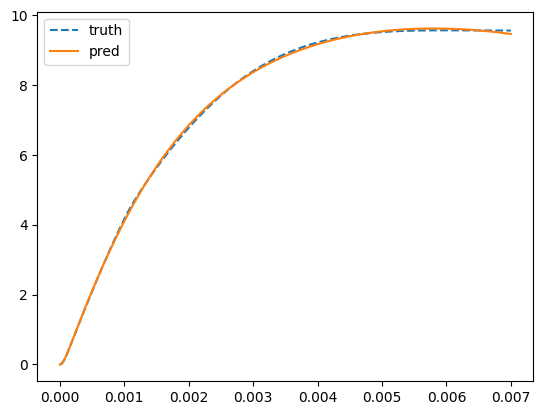

In [5]:
plt.plot(df['diameter'], df['v_t'], linestyle="dashed", label="truth")
plt.plot(df['diameter'], df['pred'], label="pred")

plt.legend()
# plt.xscale('log')
# plt.yscale('log')

In [6]:
df[df['pred'].diff() < 0][['diameter', 'pred']]

,diameter,pred
979,0.005863,9.626336
980,0.005915,9.625286
981,0.005968,9.623590
982,0.006021,9.621237
983,0.006075,9.618217
984,0.006129,9.614518
985,0.006183,9.610129
986,0.006238,9.605039
987,0.006294,9.599236
988,0.006350,9.592708


In [ ]:
x = sp.Symbol('x')

poly_expr = sum(c * x**i for i, c in enumerate(coeffs[::-1]))

d = sp.Symbol('d')
log_d = sp.log(d, 10)
velocity_expr = 10 ** poly_expr.subs(x, log_d)
velocity_func = sp.lambdify(d, velocity_expr, modules='numpy')
velocity_expr

10**(-0.00265434704170371*log(d)**10/log(10)**10 - 0.106239617068805*log(d)**9/log(10)**9 - 1.88457123935255*log(d)**8/log(10)**8 - 19.4989529618349*log(d)**7/log(10)**7 - 130.251350853925*log(d)**6/log(10)**6 - 586.761762232155*log(d)**5/log(10)**5 - 1805.09980596645*log(d)**4/log(10)**4 - 3745.19454509756*log(d)**3/log(10)**3 - 5018.06792752974*log(d)**2/log(10)**2 - 3924.43606250529*log(d)/log(10) - 1361.04187680398)

In [12]:
code = sp.fcode(velocity_expr, assign_to="res", source_format="free", standard=95)
func = wrap_as_function(code, name="ref", args=['d'])
print(func)

PURE ELEMENTAL FUNCTION ref(d) result(res)
    IMPLICIT NONE
    real(kind(0d0)), INTENT(IN) :: d
    real(kind(0d0)) :: res
    res = 10**(-0.00265434704170371d0*log(d)**10/2.3025850929940457d0**10 - &
      0.106239617068805d0*log(d)**9/2.3025850929940457d0**9 - &
      1.88457123935255d0*log(d)**8/2.3025850929940457d0**8 - &
      19.4989529618349d0*log(d)**7/2.3025850929940457d0**7 - &
      130.251350853925d0*log(d)**6/2.3025850929940457d0**6 - &
      586.761762232155d0*log(d)**5/2.3025850929940457d0**5 - &
      1805.09980596645d0*log(d)**4/2.3025850929940457d0**4 - &
      3745.19454509756d0*log(d)**3/2.3025850929940457d0**3 - &
      5018.06792752974d0*log(d)**2/2.3025850929940457d0**2 - &
      3924.43606250529d0*log(d)/2.3025850929940457d0 - &
      1361.04187680398d0)
END FUNCTION ref
